Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using TensorFlow backend.


In select_subset_of_data

(1, 15000)
In select_subset_of_data

(1, 3000)
Filtered data shape is
(15000, 3072)
(15000, 3)

In get_config_value()
Error occurred while reading config file  AS1.ini
Model file is  None

In get_config_value()
Error occurred while reading config file  AS1.ini
Model weights file is  None

In get_config_value()
Error occurred while reading config file  AS1.ini
Retrain model is  None

Trying to read from drive


In get_config_value()
Model file is  /content/drive/My Drive/Colab Notebooks/deep learning/AS1/dnn_images_nn.json

In get_config_value()
Model weights file is  /content/drive/My Drive/Colab Notebooks/deep learning/AS1/dnn_model.h5

In get_config_value()
Retrain model is  False

Error occurred while reading model file /content/drive/My Drive/Colab Notebooks/deep learning/AS1/dnn_images_nn.json

No saved model found on disk

Google drive is  True

In build_and_train_model


*** Layer 1 output size 1024
Layer 2 output size 512
Layer 3 output size 3
*** Drop

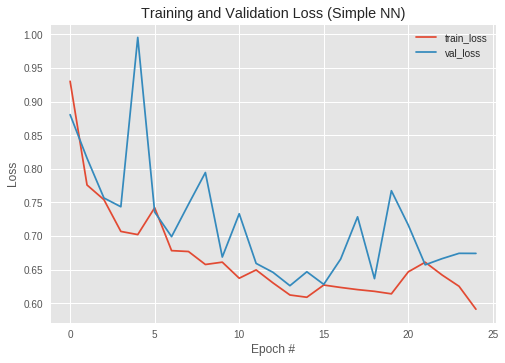

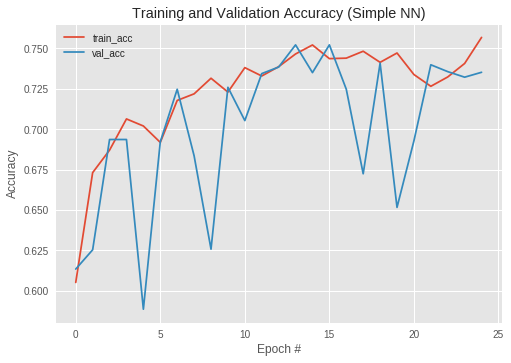


In build_and_train_model


*** Layer 1 output size 1024
Layer 2 output size 512
Layer 3 output size 3
*** Dropout1 0.200000
*** Dropout2 0.000000
Optimizer being used is optimizers.SGD(lr=0.001)

google_drive is  True

Saving to google drive
Train on 10049 samples, validate on 4951 samples
Epoch 1/25
10049/10049 [==============================] - 2s 235us/step - loss: 0.9808 - acc: 0.5254 - val_loss: 0.9140 - val_acc: 0.5530

Epoch 00001: val_acc improved from -inf to 0.55302, saving model to /content/drive/My Drive/Colab Notebooks/deep learning/AS1/checkpoints/weights-improvement-01-0.55.hdf5
Epoch 2/25
10049/10049 [==============================] - 2s 205us/step - loss: 0.8578 - acc: 0.6377 - val_loss: 0.8124 - val_acc: 0.6784

Epoch 00002: val_acc improved from 0.55302 to 0.67845, saving model to /content/drive/My Drive/Colab Notebooks/deep learning/AS1/checkpoints/weights-improvement-02-0.68.hdf5
Epoch 3/25
10049/10049 [==============================] - 2s 212us/step - loss: 0.805

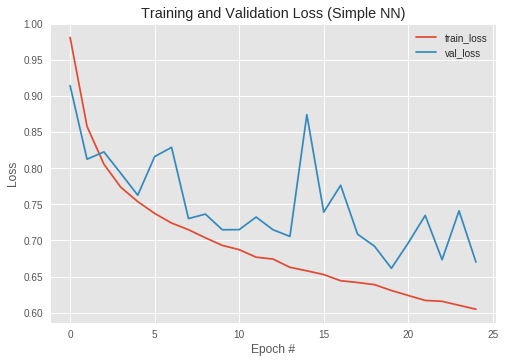

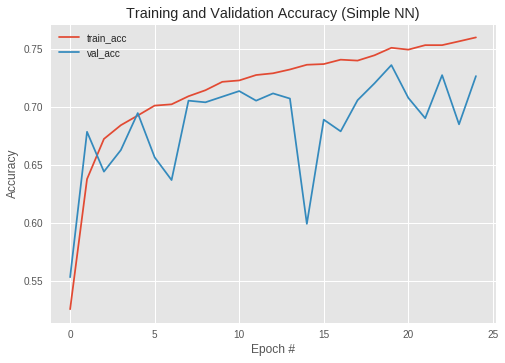


Validation accuracy for Adam is greater than SGD. Sticking with Adam
tune_hyperparameters

(15000, 3072)
Records used for tuning are 1500

(1500, 3072)
(1500, 3)



Generating optimizers list for tuning hyperparameters

optimizer_name
optimizers.Adam(lr=0.001)
optimizer_name
optimizers.Adam(lr=0.0001)
Done


*** Running GridSearchCV to tune hyperparameters.

*** After GridSearchCV


 *** Before GridSearch fit


*** Layer 1 output size 1024
Layer 2 output size 512
Layer 3 output size 3
*** Dropout1 0.000000
*** Dropout2 0.000000
Optimizer being used is optimizers.Adam(lr=0.001)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



*** Layer 1 output size 1024
Layer 2 output size 512
Layer 3 output size 3
*** Dropout1 0.000000
*** Dropout2 0.000000
Optimizer being used is optimizers.Adam(lr=0.001)


*** Layer 1 output size 1024
Layer 2 output size 512
Layer 3 output size 3
*** Dropout1 0.000000
*** Dropout2 0.000000
Optimizer being used is optimizers.Adam(lr=0.001)


*** Layer 1 output size 1024
Layer 2 output size 512
Layer 3 output size 3
*** Dropout1 0.000000
*** Dropout2 0.000000
Optimizer being used is optimizers.Adam(lr=0.0001)


*** Layer 1 output size 1024
Layer 2 output size 512
Layer 3 output size 3
*** Dropout1 0.000000
*** Dropout2 0.000000
Optimizer being used is optimizers.Adam(lr=0.0001)


*** Layer 1 output size 1024
Layer 2 output size 512
Layer 3 output size 3
*** Dropout1 0.000000
*** Dropout2 0.000000
Optimizer being used is optimizers.Adam(lr=0.0001)


*** Layer 1 output size 1536
Layer 2 output size 768
Layer 3 output size 3
*** Dropout1 0.000000
*** Dropout2 0.000000
Optimizer being used i

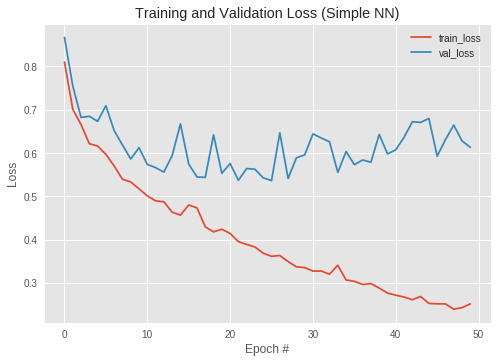

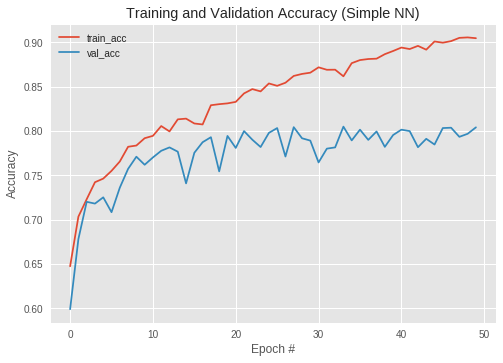


[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.72      0.85      0.78      1000
  automobile       0.86      0.86      0.86      1000
        bird       0.86      0.70      0.77      1000

   micro avg       0.80      0.80      0.80      3000
   macro avg       0.81      0.80      0.80      3000
weighted avg       0.81      0.80      0.80      3000



In [3]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"

import configparser
from keras import models
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras.layers import Dropout
from keras.layers.core import Dense
from keras.models import model_from_json
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib import pyplot as plt
from scipy.misc import toimage
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
import random

google_drive = False

def load_data():
    return cifar10.load_data()

def get_config_value(config_file, section_name, option_name):
    print("\nIn get_config_value()")

    config = configparser.ConfigParser()
    
    try:
        with open(config_file) as f:
            config.read_file(f)
            return config.get(section_name, option_name)
    except IOError:
        print("Error occurred while reading config file ", config_file)

def filter_data(X_train, Y_train, X_test, Y_test, data_size):
    filtered_X_train, filtered_Y_train = select_subset_of_data(X_train, Y_train, data_size)
    filtered_X_test, filtered_Y_test = select_subset_of_data(X_test, Y_test, data_size)

    filtered_X_train = filtered_X_train.astype('float32')
    filtered_X_test = filtered_X_test.astype('float32')
    filtered_X_train = filtered_X_train / 255.0
    filtered_X_test = filtered_X_test / 255.0
    filtered_Y_train = np_utils.to_categorical(filtered_Y_train)
    filtered_Y_test = np_utils.to_categorical(filtered_Y_test)
    
    filtered_X_train = flatten_data(filtered_X_train, data_size)
    filtered_X_test = flatten_data(filtered_X_test, data_size)

    print("Filtered data shape is")
    print(filtered_X_train.shape)
    print(filtered_Y_train.shape)

    return ((filtered_X_train, filtered_Y_train), (filtered_X_test, filtered_Y_test))
    
def select_subset_of_data(data, labels, data_size):
    print("In select_subset_of_data\n")
    
    indices = np.asarray(np.where((labels == 0) | (labels == 1) | (labels == 2)))
    indices = indices[0].reshape((1, -1))
    print(indices.shape)

    desired_indices = indices.flatten()
    filtered_input_records = flatten_data(data[np.ix_(desired_indices)], data_size)
    filtered_labels = labels[np.ix_(desired_indices)]
    return filtered_input_records, filtered_labels

def train_validation_split(data, labels, offset = 1000):
    validation_data = data[0:offset,]
    training_data = data[offset:,]
    validation_labels = labels[0:offset,]
    training_labels = labels[offset:, ]
    return training_data, training_labels, validation_data, validation_labels
    
def create_model(optimizer_to_use = 'optimizers.SGD(lr=0.01)', dropout1 = 0.2, 
                 dropout2 = 0.2, layer_1_output_size = 1024, activation1 = 'relu', 
                 activation2 = 'relu', activation3 = 'softmax', loss_function = 'categorical_crossentropy', 
                 data_size = 3072):
    model = models.Sequential()
    
#    layer_1_output_size = int(data_size / 3)
    layer_2_output_size = int(layer_1_output_size / 2)
    output_size = 3
    
    print("\n*** Layer 1 output size %d" % layer_1_output_size)
    print("Layer 2 output size %d" % layer_2_output_size)
    print("Layer 3 output size %d" % output_size)
    print("*** Dropout1 %f" % dropout1)
    print("*** Dropout2 %f" % dropout2)
    print("Optimizer being used is %s\n" % optimizer_to_use)
    
    model.add(Dense(layer_1_output_size, input_shape = (data_size,), activation = activation1))
    model.add(Dropout(dropout1))
    model.add(Dense(layer_2_output_size, activation = activation2))
    model.add(Dropout(dropout2))
    model.add(Dense(output_size, activation = activation3))

    model.compile(loss=loss_function, optimizer = eval(optimizer_to_use), metrics=['acc'])
    return model

def flatten_data(data, data_size):
    flattened_data = np.reshape(data, (-1, data_size))
    return flattened_data

def create_image_grid(data):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(toimage(data[i]))
    # show the plot
    plt.show()
    
def plot(epochs, title, fit, ylabel, xlabel, y_param1, y_param2, y_label1, y_label2):
    N = np.arange(0, epochs)
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(N, fit.history[y_param1], label=y_label1)
    plt.plot(N, fit.history[y_param2], label=y_label2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()    
    
def tune_hyperparameters(X_train, Y_train, def_optimizer, proportion_to_use = 0.1, data_size = 3072):
    print("tune_hyperparameters\n")
    print(X_train.shape)
    records_to_use = int(X_train.shape[0] * proportion_to_use)
    print("Records used for tuning are %d\n" % records_to_use)

    filtered_X_train = X_train[0:records_to_use, ]
    print(filtered_X_train.shape)
    
    filtered_Y_train = Y_train[0:records_to_use,]
    print(filtered_Y_train.shape)
    
    print("\n")

    keras_model = KerasClassifier(build_fn = create_model, epochs = 40, batch_size = 32, 
                                  dropout1=0.2, dropout2 = 0, layer_1_output_size = 1024, verbose = 0)

    #optimizer = ['SGD', 'RMSprop', 'Adam']
    learning_rate = [0.001, 0.0001]
    layer_1_output_sizes = [int(data_size / 3), int(data_size / 2)]
    epochs = [25, 50]
    dropouts1 = [0, 0.2]
    dropouts2 = [0, 0.2]

    print("\nGenerating optimizers list for tuning hyperparameters\n")
    optimizers_with_rates = []
    for j in range(0, len(learning_rate)):
        optimizer_name = def_optimizer + "(" + "lr=" + str(learning_rate[j]) + ")"
        print("optimizer_name")
        print(optimizer_name)
        optimizers_with_rates.append(optimizer_name)
    print("Done\n")       

    print("\n*** Running GridSearchCV to tune hyperparameters.")
    param_grid = dict(epochs=epochs, optimizer_to_use=optimizers_with_rates, dropout1=dropouts1, dropout2=dropouts2,
                     layer_1_output_size = layer_1_output_sizes)

    grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs=1)
    print("\n*** After GridSearchCV\n")

    print("\n *** Before GridSearch fit\n")
    grid_result = grid.fit(filtered_X_train, filtered_Y_train)
    print("\n *** After GridSearch fit\n")

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
        
    return grid_result.best_params_
        
        
def build_and_train_model(X_train, Y_train, epochs, dropout1, dropout2, optimizer):
    print("\nIn build_and_train_model\n")
    model = create_model(optimizer, dropout1, dropout2)

    print("google_drive is ", google_drive)
    
    if not os.path.exists("checkpoints"):
        print("Creating checkpoints directory")
        os.makedirs("checkpoints")

    if (google_drive == True) :
      print("\nSaving to google drive")
      best_model = os.path.join("/content/drive/My Drive/Colab Notebooks/deep learning/AS1/checkpoints",
                                "weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5")
    else:
      print("\nSaving to local disk")
      best_model = os.path.join("checkpoints", 
                                "weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5")
      
    checkpoint = ModelCheckpoint(best_model, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    fit = model.fit(X_train, Y_train,
                    validation_split = 0.33,
                    epochs = epochs, batch_size = 32, callbacks=callbacks_list)

    # plot the training loss and accuracy
    plot(epochs, "Training and Validation Loss (Simple NN)", fit, "Loss", "Epoch #", "loss", "val_loss", "train_loss", "val_loss")
    plot(epochs, "Training and Validation Accuracy (Simple NN)", fit, "Accuracy", "Epoch #", "acc", "val_acc", "train_acc", "val_acc")
    
    return model, fit

# https://machinelearningmastery.com/save-load-keras-deep-learning-models/
def save_model(model, model_file, weights_file):
    model_json = model.to_json()
    
    with open(model_file, "w") as json_file:
        json_file.write(model_json)
        
    model.save_weights(weights_file)

# https://machinelearningmastery.com/save-load-keras-deep-learning-models/    
def load_model(model_file, weights_file):
    try:
        json_file = open(model_file, 'r')
        print("\nOpened model file")
        loaded_model_json = json_file.read()

        json_file.close()

        loaded_model = model_from_json(loaded_model_json)
        
        print("\nLoading weights")
        # load weights into new model
        loaded_model.load_weights(weights_file)
        return loaded_model

    except IOError:
        print("\nError occurred while reading model file", model_file)
        return None

def test_model(model, X_test, Y_test):
    print("\n[INFO] evaluating network...")
    classes = np.array(["airplane", "automobile", "bird"])
    predictions = model.predict(X_test, batch_size=32)
    print(classification_report(Y_test.argmax(axis=1),
        predictions.argmax(axis=1), target_names=classes))
    
# Main program starts here.
def main():
    # load data
    (X_train, Y_train), (X_test, Y_test) = load_data()
    classes = np.array(["airplane", "automobile", "bird"])
    data_size = 3072
    
    (filtered_X_train, filtered_Y_train), (filtered_X_test, filtered_Y_test) = filter_data(X_train, 
                                                                                           Y_train, 
                                                                                           X_test, 
                                                                                           Y_test,
                                                                                           data_size)
    model_file = get_config_value("AS1.ini", "Task 1", "modelFile")
    print("Model file is ", model_file)

    weights_file = get_config_value("AS1.ini", "Task 1", "modelWeightsFile")
    print("Model weights file is ", weights_file)

    retrain_model = get_config_value("AS1.ini", "Task 1", "retrain_model")
    print("Retrain model is ", retrain_model)
    
    if (model_file is None):
      print("\nTrying to read from drive\n")
      config_file = "/content/drive/My Drive/Colab Notebooks/deep learning/AS1/AS1.ini"
      model_file = get_config_value(config_file, "Task 1", "modelFile")
      model_file = "/content/drive/My Drive/Colab Notebooks/deep learning/AS1/" + model_file
      print("Model file is ", model_file)

      weights_file = get_config_value(config_file, "Task 1", "modelWeightsFile")
      weights_file = "/content/drive/My Drive/Colab Notebooks/deep learning/AS1/" + weights_file
      print("Model weights file is ", weights_file)

      retrain_model = get_config_value(config_file, "Task 1", "retrain_model")
      print("Retrain model is ", retrain_model)
      
      global google_drive
      google_drive = True

    loaded_model = load_model(model_file, weights_file)
    if (loaded_model is not None):
        print("\nLoaded model successfully from saved model and weights")
    else:
        print("\nNo saved model found on disk")
    
    if (retrain_model == True):
        print("\nRetraining model")
    else:
        if (loaded_model is not None):
            print("\nNot Retraining model")
            return test_model(loaded_model, filtered_X_test, filtered_Y_test)
    
    print("\nGoogle drive is ", google_drive)
    def_epochs = 25
    def_optimizer = 'optimizers.Adam(lr=0.001)'
    def_dropout1 = 0.2
    def_dropout2 = 0

    adam_default_model, fit_adam = build_and_train_model(filtered_X_train, filtered_Y_train, def_epochs, def_dropout1, def_dropout2, 
                                               def_optimizer)

    sgd_default_model, fit_sgd = build_and_train_model(filtered_X_train, filtered_Y_train, def_epochs, def_dropout1, def_dropout2, 
                                              "optimizers.SGD(lr=0.001)")

    def_optimizer = "optimizers.Adam"
    if (fit_adam.history["val_acc"] < fit_sgd.history["val_acc"]):
        print("\nValidation accuracy for SGD is greater than Adam. Going with SGD")
        def_optimizer = "optimizers.SGD"
    else:
        print("\nValidation accuracy for Adam is greater than SGD. Sticking with Adam")

    best_params = tune_hyperparameters(filtered_X_train, filtered_Y_train, def_optimizer)
    tuned_dropout1 = best_params['dropout1']
    tuned_dropout2 = best_params['dropout2']
    tuned_optimizer = best_params['optimizer_to_use']
    tuned_epochs = best_params['epochs']

    tuned_model, fit_tuned = build_and_train_model(filtered_X_train, filtered_Y_train, tuned_epochs, tuned_dropout1, tuned_dropout2, 
                                                   tuned_optimizer)

    test_model(tuned_model, filtered_X_test, filtered_Y_test)    
    save_model(tuned_model, model_file, weights_file)
    
main()    
